In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [8]:
color = pd.read_csv('../Data/color.csv', index_col=0)

In [59]:
colors = color[['cbaAlikeWord','cbaKeyword']]
c_ls = []
c_cnt = []
for c in colors['cbaAlikeWord']:
    c_ls.append(c.split(','))
    c_cnt.append(len(c.split(',')))
colors['cbaAlikeWord'] = c_ls
colors['word_len'] = c_cnt
colors

/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_93129/332766648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colors['cbaAlikeWord'] = c_ls
/var/folders/hr/y8znbyhd4058w4d5l14qqsv80000gn/T/ipykernel_93129/332766648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colors['word_len'] = c_cnt


,cbaAlikeWord,cbaKeyword,word_len
0,"[강렬한, 정열적인, 대담한, 돋보이는]",강한,4
1,"[강렬한, 정열적인, 대담한, 돋보이는]",강한,4
2,"[강렬한, 정열적인, 대담한, 돋보이는]",강한,4
3,"[강렬한, 정열적인, 대담한, 돋보이는]",강한,4
4,"[강렬한, 정열적인, 대담한, 돋보이는]",강한,4
...,...,...,...
1518,"[소녀적인, 약한, 청순한]",순수한,3
1519,"[소녀적인, 약한, 청순한]",순수한,3
1520,"[소녀적인, 약한, 청순한]",순수한,3
1521,"[소녀적인, 약한, 청순한]",순수한,3


In [19]:
ls = []
for c in colors['cbaAlikeWord']:
    ls.append(c.split(','))

In [40]:
word1,word2,word3,word4,word5,word6,word7,word8,word9 = [], [], [], [], [], [], [], [], []
for i in ls:
    word1.append(i[0])
    try:
        word2.append(i[1])
    except:
        word2.append('')
    try:
        word3.append(i[2])
    except:
        word3.append('')
    try:
        word4.append(i[3])
    except:
        word4.append('')
    try:
        word5.append(i[4])
    except:
        word5.append('')
    try:
        word6.append(i[5])
    except:
        word6.append('')
    try:
        word7.append(i[6])
    except:
        word7.append('')
    try:
        word8.append(i[7])
    except:
        word8.append('')
    try:
        word9.append(i[8])
    except:
        word9.append('')

In [141]:
dc = dict(zip(['AlikeWord'+str(i) for i in range(1,10)], [word1,word2,word3,word4,word5,word6,word7,word8,word9]))
df = pd.DataFrame(dc)
df['Keyword'] = colors['cbaKeyword']
df['word_cnt'] = colors['word_len']
df

,AlikeWord1,AlikeWord2,AlikeWord3,AlikeWord4,AlikeWord5,AlikeWord6,AlikeWord7,AlikeWord8,AlikeWord9,Keyword,word_cnt
0,강렬한,정열적인,대담한,돋보이는,,,,,,강한,4.0
1,강렬한,정열적인,대담한,돋보이는,,,,,,강한,4.0
2,강렬한,정열적인,대담한,돋보이는,,,,,,강한,4.0
3,강렬한,정열적인,대담한,돋보이는,,,,,,강한,4.0
4,강렬한,정열적인,대담한,돋보이는,,,,,,강한,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1279,소녀적인,약한,청순한,,,,,,,재미있는,1.0
1280,소녀적인,약한,청순한,,,,,,,재미있는,1.0
1281,소녀적인,약한,청순한,,,,,,,재미있는,1.0
1282,소녀적인,약한,청순한,,,,,,,재미있는,1.0


색상 코드별 단어 분포(각 색상 마다 어울리는 단어들의 수)

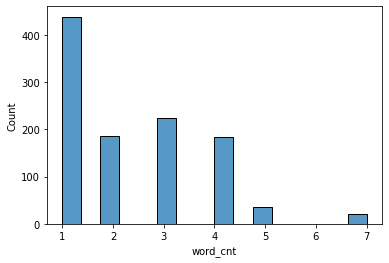

In [143]:
sns.histplot(df['word_cnt'])
plt.show()  

In [122]:
word_ls = []
for i in range(1, 10):
    word_ls += list(df['AlikeWord'+str(i)])
len(word_ls)
word_df = pd.DataFrame({"word_ls":word_ls})

In [128]:
words = word_df.value_counts('word_ls').keys()[1:]

In [110]:
from wordcloud import WordCloud

def show_wordcloud(data): 
    wordcloud = WordCloud(
        font_path = r'/Library/Fonts/AppleGothic.ttf', #글자가 깨져서 폰트 파일의 주소를 할당해 주었다. 
                          background_color='white', 
                          max_words=100, 
                          max_font_size=30, 
                          scale=3, 
                          random_state=1) 
    
    wordcloud=wordcloud.generate(str(data)) 
    
    fig = plt.figure(1, figsize=(12, 12)) 
    plt.axis('off') 
    
    plt.imshow(wordcloud) 
    plt.show() 

감성배색 wordclowd : 	AlikeWord

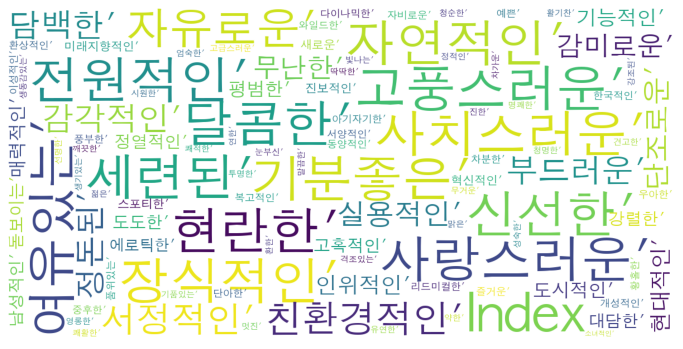

In [131]:
show_wordcloud(words)

감성배색 wordclowd : 	keyWord

In [139]:
keywords = list(df['Keyword'].value_counts().keys())

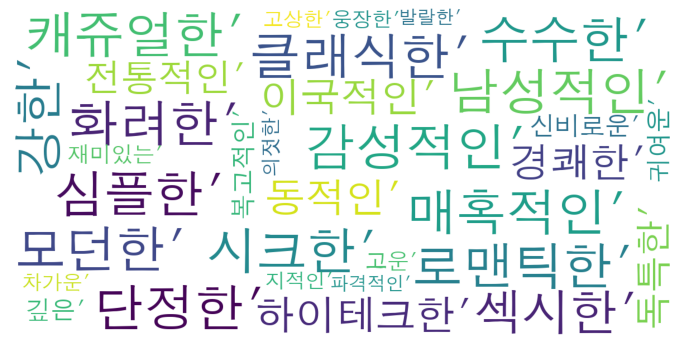

In [140]:
show_wordcloud(keywords)